<a href="https://colab.research.google.com/github/awaneesh1979/portfolio/blob/main/week3_day2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q --upgrade datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.6 MB/s eta 0:00:00


In [3]:
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio


In [4]:
hf_token = userdata.get("HF_TOKEN")
if hf_token and hf_token.startswith('hf_') :
  print('hugging face token loaded successfully')
else:
  print('Error in loading hf token')
login(hf_token,add_to_git_credential=True)


hugging face token loaded successfully


In [4]:
!git config --global credential.helper store

In [8]:
my_simple_sentiment_analyzer = pipeline('sentiment-analysis',model='nlptown/bert-base-multilingual-uncased-sentiment',device='cuda')
result= my_simple_sentiment_analyzer("Singapore is the great country to live in for Asians but not for Americans but I an an American")
print(result)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda


[{'label': '4 stars', 'score': 0.29591795802116394}]


In [11]:
my_name_entity_recognizer = pipeline('ner',device='cuda')
results = my_name_entity_recognizer("Awaneesh is born in India but now a days lives in Singapore")

for result in results:
  print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


{'entity': 'I-PER', 'score': np.float32(0.9985184), 'index': 1, 'word': 'A', 'start': 0, 'end': 1}
{'entity': 'I-PER', 'score': np.float32(0.9857734), 'index': 2, 'word': '##wan', 'start': 1, 'end': 4}
{'entity': 'I-PER', 'score': np.float32(0.99680966), 'index': 3, 'word': '##ees', 'start': 4, 'end': 7}
{'entity': 'I-PER', 'score': np.float32(0.997491), 'index': 4, 'word': '##h', 'start': 7, 'end': 8}
{'entity': 'I-LOC', 'score': np.float32(0.9996872), 'index': 8, 'word': 'India', 'start': 20, 'end': 25}
{'entity': 'I-LOC', 'score': np.float32(0.9998462), 'index': 15, 'word': 'Singapore', 'start': 50, 'end': 59}


In [15]:
# Question and Answer pipeline

my_question_answer_pipeline = pipeline('question-answering', device='cuda')
context = "Color of rose is green"
result = my_question_answer_pipeline(question='what is the color of the rose flower', context=context)

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.9725843667984009, 'start': 17, 'end': 22, 'answer': 'green'}


In [31]:
# pipeline for summarization

my_simple_summarizer = pipeline('summarization', device='cuda')
text = '''
Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021.

Born into a wealthy family in New York City, Trump graduated from the University of Pennsylvania in 1968 with a bachelor's degree in economics. He became the president of his family's real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He also launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against Democratic Party nominee Hillary Clinton.

During his first presidency, Trump imposed a travel ban on seven Muslim-majority countries, expanded the Mexico–United States border wall, and enforced a family separation policy on the border. He rolled back environmental and business regulations, signed the Tax Cuts and Jobs Act, and appointed three Supreme Court justices. In foreign policy, Trump withdrew the U.S. from agreements on climate, trade, and Iran's nuclear program, and initiated a trade war with China. In response to the COVID-19 pandemic from 2020, he downplayed its severity, contradicted health officials, and signed the CARES Act. After losing the 2020 presidential election to Joe Biden, Trump attempted to overturn the result, culminating in the January 6 Capitol attack in 2021. He was impeached in 2019 for abuse of power and obstruction of Congress, and in 2021 for incitement of insurrection; the Senate acquitted him both times.

In 2023, Trump was found liable in civil cases for sexual abuse and defamation and for business fraud. He was found guilty of falsifying business records in 2024, making him the first U.S. president convicted of a felony. After winning the 2024 presidential election against then-Vice President Kamala Harris, he was sentenced to a penalty-free discharge, and two felony indictments against him for retention of classified documents and obstruction of the 2020 election were dismissed without prejudice.

Trump began his second presidency by initiating mass layoffs of federal workers. He imposed tariffs on nearly all countries at the highest level since the Great Depression and signed the One Big Beautiful Bill Act. His administration's actions—including targeting of political opponents and civil society, actions against transgender people, deportations of immigrants, and extensive use of executive orders—have drawn over 300 lawsuits challenging the legality and constitutionality of the actions.

Since 2015, Trump's leadership style and political agenda—often referred to as Trumpism—have reshaped the Republican Party's identity. Many of his comments and actions have been characterized as racist or misogynistic, and he has made false or misleading statements and promoted conspiracy theories to a degree unprecedented in American politics. Trump's actions, especially in his second term, have been described as authoritarian and contributing to democratic backsliding. After his first term, scholars and historians ranked him as one of the worst presidents in American history.
 '''

result = my_simple_summarizer(text, max_length=50, min_length=25, do_sample=False)
print(result[0].get('summary_text'))

# Add a translator pipeline to convert the text to hindi

translator = pipeline("translation_en_to_fr")


result = translator(result[0].get('summary_text'), max_length=400)

print(result)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Donald John Trump is the 47th president of the United States . He served as the 45th president from 2017 to 2021 . He was impeached in 2019 for abuse of power and obstruction of Congress, and in 2021 for incitement of


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=400) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'translation_text': 'Donald John Trump est le 47e président des États-Unis . Il a été le 45e président de 2017 à 2021 .'}]


In [7]:
# Zero shot classification

my_classifier = pipeline('zero-shot-classification', device='cuda')
result = my_classifier('Donald Trump is a real nut', candidate_labels=['technology', "Politics", 'Games'])

print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': 'Donald Trump is a real nut', 'labels': ['Politics', 'Games', 'technology'], 'scores': [0.6969000697135925, 0.25687146186828613, 0.04622849449515343]}


In [10]:
# Text generator
my_text_generator = pipeline('text-generation', device='cuda')
result = my_text_generator('History of America is')

print(result)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "History of America is that it is the only country in the world that does not have any government that has a monopoly on its information. In fact, the only country that has control over its information is the United States.\n\n\nAs a result, there is a growing consensus that people are dying because of government. The last thing is the government of the United States going to care about us. It's their own government. They are going to be responsible for what they do, not what is provided to them by government. We're going to have to get control over government.\n\n\nThe only way to prevent that is for the United States to start looking for ways to take control of the information that we provide to others and give it to them.\n\n\nThe problem is that we have the illusion of government. The government of the United States is in charge of information that we give people. So we have the illusion that the government of the United States is in charge of information that w

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/4 [00:00<?, ?it/s]

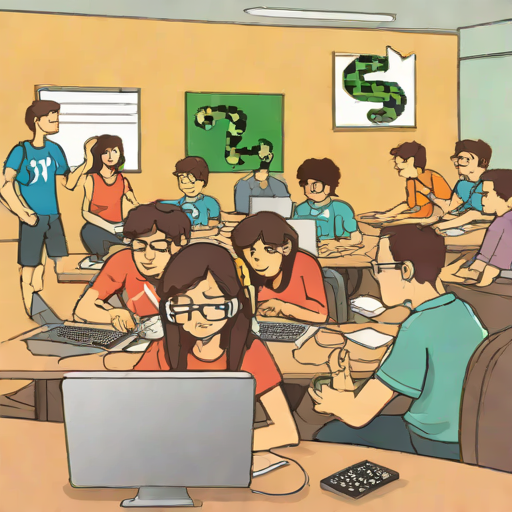

In [11]:
# Image generation use case

from transformers import pipeline
from diffusers import AutoPipelineForText2Image
import torch


pipe = AutoPipelineForText2Image.from_pretrained('stabilityai/sdxl-turbo',torch_dtype=torch.float16, variant='fp16')
pipe.to('cuda')
prompt = 'A class of students trying to learn coding in python'

image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)

In [15]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2


In [3]:
# generating audio from text

from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch
from IPython.display import Audio

synthesiser = pipeline('text-to-speech', model='microsoft/VibeVoice-1.5B')
audio_data = synthesiser('Where are we heading in the new world of AI that is taking us to our disastor')

Audio(audio_data["audio"], rate=audio_data["sampling_rate"])


ValueError: The checkpoint you are trying to load has model type `vibevoice` but Transformers does not recognize this architecture. This could be because of an issue with the checkpoint, or because your version of Transformers is out of date.

You can update Transformers with the command `pip install --upgrade transformers`. If this does not work, and the checkpoint is very new, then there may not be a release version that supports this model yet. In this case, you can get the most up-to-date code by installing Transformers from source with the command `pip install git+https://github.com/huggingface/transformers.git`